In [103]:
import pandas as pd
import numpy as np
import glob, warnings
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from datetime import datetime

warnings.filterwarnings(action='ignore')

from IPython.core.display import display, HTML

display(HTML("<style>.container { width: 80% !important; }</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#legend.fontsize	범례의 글꼴 크기 
#legend.title_fontsize
COLOR='black'
parameters = {'axes.labelsize': 25,
          'axes.titlesize': 35,
          'xtick.labelsize' : 15,
          'ytick.labelsize' : 15,
          'text.color' : COLOR, 'axes.labelcolor' : COLOR, 'xtick.color': COLOR, 'ytick.color' : COLOR}


plt.rcParams.update(parameters)

import matplotlib.ticker as ticker
import matplotlib.dates as md
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from itertools import chain
from sklearn.cluster import DBSCAN

### 막곡 데이터

In [104]:
# 데이터 로드
makgok_model_makgok_data = pd.read_csv("data/막곡 2022-01-14(makgok).csv")
makgok_model_makgok_data.shape

(283, 5)

In [105]:
makgok_model_makgok_data = makgok_model_makgok_data[['date', 'image_name','pixel_mean', 'pixel_count']]
makgok_model_makgok_data.rename(columns = {'pixel_mean' : 'makgok_pixel_mean', 'pixel_count' : 'makgok_pixel_count'})

makgok_model_makgok_data['date'] = makgok_model_makgok_data['date'].astype(str)
makgok_model_makgok_data['date'] = pd.to_datetime(makgok_model_makgok_data['date'])

,date,image_name,makgok_pixel_mean,makgok_pixel_count
0,20220114000316,"H02_CT02,3_20220114000316_farm_image_real_3cf4...",13850.0,11
1,20220114000627,"H02_CT02,6_20220114000627_farm_image_real_7e4e...",13274.0,8
2,20220114001323,"H02_CT02,3_20220114001323_farm_image_real_8215...",13176.0,12
3,20220114001628,"H02_CT02,6_20220114001628_farm_image_real_8be8...",13836.0,8
4,20220114002317,"H02_CT02,3_20220114002317_farm_image_real_5be9...",14364.0,6
...,...,...,...,...
278,20220114233621,"H02_CT02,6_20220114233621_farm_image_real_67e5...",12798.0,2
279,20220114234318,"H02_CT02,3_20220114234318_farm_image_real_d84f...",13875.0,7
280,20220114234624,"H02_CT02,6_20220114234624_farm_image_real_a147...",14048.0,7
281,20220114235317,"H02_CT02,3_20220114235317_farm_image_real_9873...",13891.0,1


In [106]:
# 데이터 로드
makgok_sansu_model_makgok_data = pd.read_csv("data/막곡 2022-01-14(makgok + sansu).csv")
makgok_sansu_model_makgok_data.shape

(269, 5)

In [107]:
makgok_sansu_model_makgok_data = makgok_sansu_model_makgok_data[['date', 'image_name','pixel_mean', 'pixel_count']]
makgok_sansu_model_makgok_data.rename(columns = {'pixel_mean' : 'makgok_sansu_pixel_mean', 'pixel_count' : 'makgok_sansu_pixel_count'})

makgok_sansu_model_makgok_data['date'] = makgok_sansu_model_makgok_data['date'].astype(str)
makgok_sansu_model_makgok_data['date'] = pd.to_datetime(makgok_sansu_model_makgok_data['date'])

,date,image_name,makgok_sansu_pixel_mean,makgok_sansu_pixel_count
0,20220114000316,"H02_CT02,3_20220114000316_farm_image_real_3cf4...",12994.0,5
1,20220114000627,"H02_CT02,6_20220114000627_farm_image_real_7e4e...",13647.0,3
2,20220114001323,"H02_CT02,3_20220114001323_farm_image_real_8215...",12991.0,3
3,20220114001628,"H02_CT02,6_20220114001628_farm_image_real_8be8...",14526.0,2
4,20220114002317,"H02_CT02,3_20220114002317_farm_image_real_5be9...",14446.0,4
...,...,...,...,...
264,20220114233621,"H02_CT02,6_20220114233621_farm_image_real_67e5...",12957.0,1
265,20220114234318,"H02_CT02,3_20220114234318_farm_image_real_d84f...",14188.0,3
266,20220114234624,"H02_CT02,6_20220114234624_farm_image_real_a147...",14466.0,3
267,20220114235317,"H02_CT02,3_20220114235317_farm_image_real_9873...",14006.0,1


In [108]:
df_joined_makgok_data = pd.merge(left = makgok_model_makgok_data, right = makgok_sansu_model_makgok_data, how = "inner", on = "image_name")
df_joined_makgok_data

,date_x,image_name,pixel_mean_x,pixel_count_x,date_y,pixel_mean_y,pixel_count_y
0,2022-01-14 00:03:16,"H02_CT02,3_20220114000316_farm_image_real_3cf4...",13850.0,11,2022-01-14 00:03:16,12994.0,5
1,2022-01-14 00:06:27,"H02_CT02,6_20220114000627_farm_image_real_7e4e...",13274.0,8,2022-01-14 00:06:27,13647.0,3
2,2022-01-14 00:13:23,"H02_CT02,3_20220114001323_farm_image_real_8215...",13176.0,12,2022-01-14 00:13:23,12991.0,3
3,2022-01-14 00:16:28,"H02_CT02,6_20220114001628_farm_image_real_8be8...",13836.0,8,2022-01-14 00:16:28,14526.0,2
4,2022-01-14 00:23:17,"H02_CT02,3_20220114002317_farm_image_real_5be9...",14364.0,6,2022-01-14 00:23:17,14446.0,4
...,...,...,...,...,...,...,...
264,2022-01-14 23:36:21,"H02_CT02,6_20220114233621_farm_image_real_67e5...",12798.0,2,2022-01-14 23:36:21,12957.0,1
265,2022-01-14 23:43:18,"H02_CT02,3_20220114234318_farm_image_real_d84f...",13875.0,7,2022-01-14 23:43:18,14188.0,3
266,2022-01-14 23:46:24,"H02_CT02,6_20220114234624_farm_image_real_a147...",14048.0,7,2022-01-14 23:46:24,14466.0,3
267,2022-01-14 23:53:17,"H02_CT02,3_20220114235317_farm_image_real_9873...",13891.0,1,2022-01-14 23:53:17,14006.0,1


### 산수 데이터

In [109]:
# 데이터 로드
makgok_model_sansu_data = pd.read_csv("data/산수 2022-02-10(makgok).csv")
makgok_model_sansu_data.shape
makgok_model_sansu_data = makgok_model_sansu_data[['date', 'image_name','pixel_mean', 'pixel_count']]
makgok_model_sansu_data.rename(columns = {'pixel_mean' : 'makgok_pixel_mean', 'pixel_count' : 'makgok_pixel_count'})

makgok_model_sansu_data['date'] = makgok_model_sansu_data['date'].astype(str)
makgok_model_sansu_data['date'] = pd.to_datetime(makgok_model_sansu_data['date'])

(149, 5)

,date,image_name,makgok_pixel_mean,makgok_pixel_count
0,20220209000334,"H03_CT10,11_20220209000334_farm_image_real_246...",14845.0,9
1,20220209001836,"H03_CT10,11_20220209001836_farm_image_real_402...",13364.0,9
2,20220209000438,"H03_CT10,12_20220209000438_farm_image_real_363...",3423.0,1
3,20220209004849,"H03_CT10,11_20220209004849_farm_image_real_8cc...",13848.0,16
4,20220209003333,"H03_CT10,11_20220209003333_farm_image_real_4de...",13137.0,16
...,...,...,...,...
144,20220209233231,"H03_CT10,10_20220209233231_farm_image_real_4f7...",4644.0,1
145,20220209233338,"H03_CT10,11_20220209233338_farm_image_real_ce8...",14030.0,15
146,20220209234734,"H03_CT10,10_20220209234734_farm_image_real_726...",3978.0,2
147,20220209234840,"H03_CT10,11_20220209234840_farm_image_real_5f4...",14565.0,15


In [120]:
# 데이터 로드
makgok_sansu_model_sansu_data = pd.read_csv("data/산수 2022-02-10(makgok + sansu).csv")
makgok_sansu_model_sansu_data.shape
makgok_sansu_model_sansu_data = makgok_sansu_model_sansu_data[['date', 'image_name','pixel_mean', 'pixel_count']]
makgok_sansu_model_sansu_data.rename(columns = {'pixel_mean' : 'makgok_pixel_mean', 'pixel_count' : 'makgok_pixel_count'})

makgok_sansu_model_sansu_data['date'] = makgok_sansu_model_sansu_data['date'].astype(str)
makgok_sansu_model_sansu_data['date'] = pd.to_datetime(makgok_sansu_model_sansu_data['date'])

(103, 5)

,date,image_name,makgok_pixel_mean,makgok_pixel_count
0,20220209000334,"H03_CT10,11_20220209000334_farm_image_real_246...",15893.0,3
1,20220209001836,"H03_CT10,11_20220209001836_farm_image_real_402...",13959.0,3
2,20220209004849,"H03_CT10,11_20220209004849_farm_image_real_8cc...",13708.0,2
3,20220209003333,"H03_CT10,11_20220209003333_farm_image_real_4de...",13660.0,3
4,20220209010338,"H03_CT10,11_20220209010338_farm_image_real_e2d...",14167.0,7
...,...,...,...,...
98,20220209224833,"H03_CT10,11_20220209224833_farm_image_real_aa1...",14964.0,4
99,20220209230334,"H03_CT10,11_20220209230334_farm_image_real_161...",15919.0,1
100,20220209231833,"H03_CT10,11_20220209231833_farm_image_real_750...",16233.0,4
101,20220209233338,"H03_CT10,11_20220209233338_farm_image_real_ce8...",14974.0,5


In [121]:
df_joined_sansu_data = pd.merge(left = makgok_model_sansu_data, right = makgok_sansu_model_sansu_data, how = "inner", on = "image_name")
df_joined_sansu_data

,date_x,image_name,pixel_mean_x,pixel_count_x,date_y,pixel_mean_y,pixel_count_y
0,2022-02-09 00:03:34,"H03_CT10,11_20220209000334_farm_image_real_246...",14845.0,9,2022-02-09 00:03:34,15893.0,3
1,2022-02-09 00:18:36,"H03_CT10,11_20220209001836_farm_image_real_402...",13364.0,9,2022-02-09 00:18:36,13959.0,3
2,2022-02-09 00:48:49,"H03_CT10,11_20220209004849_farm_image_real_8cc...",13848.0,16,2022-02-09 00:48:49,13708.0,2
3,2022-02-09 00:33:33,"H03_CT10,11_20220209003333_farm_image_real_4de...",13137.0,16,2022-02-09 00:33:33,13660.0,3
4,2022-02-09 01:03:38,"H03_CT10,11_20220209010338_farm_image_real_e2d...",14065.0,17,2022-02-09 01:03:38,14167.0,7
...,...,...,...,...,...,...,...
98,2022-02-09 22:48:33,"H03_CT10,11_20220209224833_farm_image_real_aa1...",14895.0,9,2022-02-09 22:48:33,14964.0,4
99,2022-02-09 23:03:34,"H03_CT10,11_20220209230334_farm_image_real_161...",13426.0,6,2022-02-09 23:03:34,15919.0,1
100,2022-02-09 23:18:33,"H03_CT10,11_20220209231833_farm_image_real_750...",14507.0,11,2022-02-09 23:18:33,16233.0,4
101,2022-02-09 23:33:38,"H03_CT10,11_20220209233338_farm_image_real_ce8...",14030.0,15,2022-02-09 23:33:38,14974.0,5


<AxesSubplot:title={'center':'makgok data'}, xlabel='date_x'>

<AxesSubplot:title={'center':'makgok data'}, xlabel='date_x'>

<AxesSubplot:title={'center':'sansu data'}, xlabel='date_x'>

<AxesSubplot:title={'center':'sansu data'}, xlabel='date_x'>

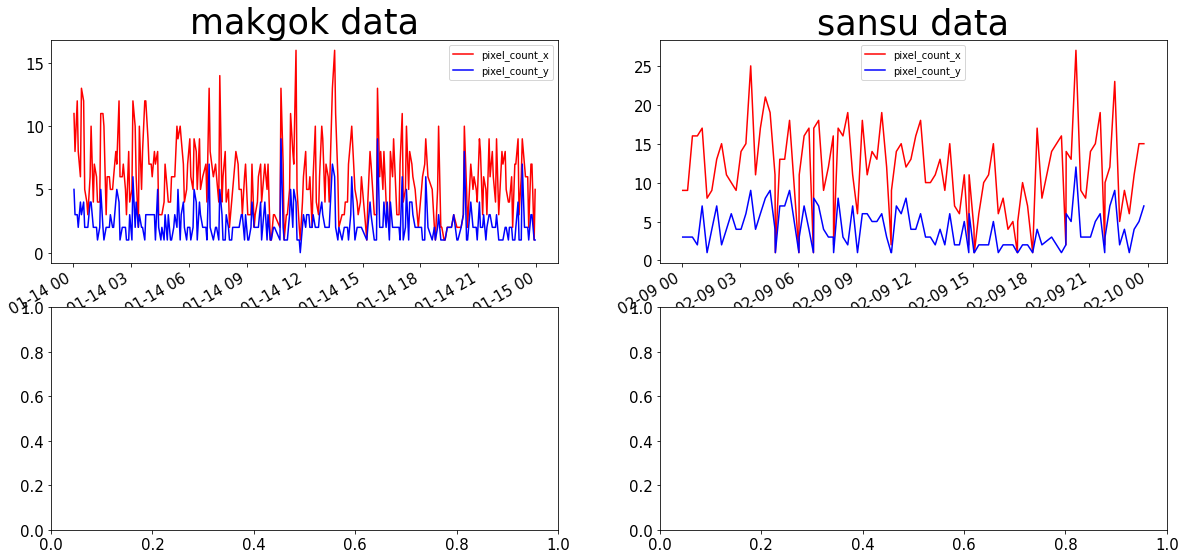

In [123]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))

df_joined_makgok_data.plot(kind="line", x = 'date_x', y = 'pixel_count_x', ax=ax[0, 0], color = 'red', title='makgok data')
df_joined_makgok_data.plot(kind="line", x ='date_x', y = 'pixel_count_y', ax=ax[0, 0], color = 'blue')

df_joined_sansu_data.plot(kind="line", x = 'date_x', y = 'pixel_count_x', ax=ax[0, 1], color = 'red', title='sansu data')
df_joined_sansu_data.plot(kind="line", x ='date_x', y = 'pixel_count_y', ax=ax[0, 1], color = 'blue')

plt.show()